In [49]:
import numpy as np

np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0] = 0 #Initialize the first value of the series to 0

random_walk = np.cumsum(steps) #Calculate the cumulative sum of errors for each timestep in the simulated process.

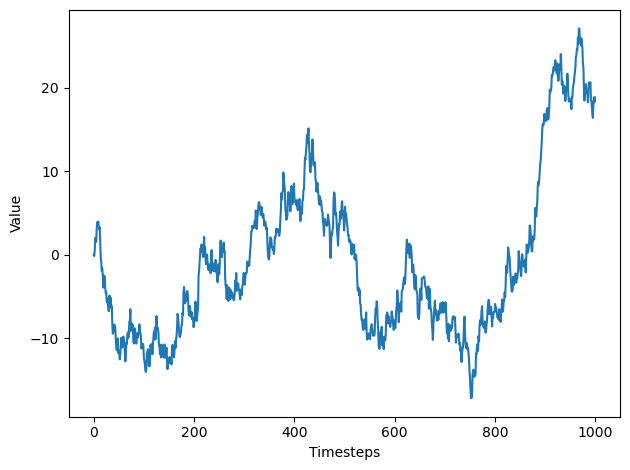

In [50]:
import matplotlib.pyplot as pt

fig, ax = pt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

pt.tight_layout()

There is a positive trend over the first 400 timesteps, followed by a negative trend, and a sharp increase toward the end. Thus, we have both sudden changes and long periods where a trend is observed. We know this is a random walk because we simulated it. However, if dealing with real-life data, we need to find a way to identify whether our time eries is a random-walk or not. Let's see how to achieve this below.

# Identifying a Random Walk

A random walk is a mathematical concept that describes a process where a variable undergoes a series of random steps or movements over time. It's often used to model various phenomena in fields such as finance, physics, biology, and computer science.

In a simple random walk, at each time step, the variable can move in either direction with equal probability. The direction and magnitude of each step are determined by random factors, such as coin flips or dice rolls. In time series analysis, random walks have several purposes:

Modeling Trend Behavior: Random walks can be used to model processes where there is no systematic trend or directionality, and where each observation depends only on the previous observation plus some random noise. This is particularly useful when dealing with non-stationary time series data, where the mean and variance change over time.

Baseline Model for Forecasting: Random walks serve as a simple baseline model for forecasting. Since they assume that future values are based solely on the current value plus a random shock, they provide a straightforward benchmark against which more sophisticated forecasting models can be compared.

- First, Gather data. 

- Then see whether if the data is stationary or not. If its not stationary, then apply transformations. 

- If it is stationary, plot autocorrelation function (ACF). 

- After that, check whether if there is any autocorrelation. If it does not have any autocorrelation, then it is a random walk. If it does have, it is not a random walk 

# Stationarity 

The process whose statistical properties does not change over time. A time series is said to be stationary if its mean, variance, and autocorrelation do not change over time. 

Transformation is simply a mathematical manipulation of the data that stabilizes its mean and variance, thus making it stationary. The simplest transformation one can apply is DIFFERENCING. This transformation helps stabilize the mean, which in turn removes or reduces the trend and seasonlity effects. Differencing involves calculating the series of changes from one timestep to another.

# Transformation in Time Series Forecasting
A transformation is a mathematical operation applied to a time series in order to make it stationary. 

Differencing is a transformation that calculates the change from one timestep to another. This transformation is useful for stabilizing the mean.

Applying a log function to the series can stabilize its variance.

Keep in mind that when we model a time series that has been transformed, we must UNTRANSFORM it to return the results of the model to the original units of measurement. The formal term for undoing a transformation is inverse transform. Therefore, if apply log transformation to your data, make sure to raise your forecast values to the power of 10 in order to bring the values back to their original magnitude. So that our predictions will make sense in their original context.

TL;DR - Apply differencing to stabilize mean and apply logarithm function to stabilize variance to make a time series stationary. But doesnt necessarily need to apply both to make it stationary.

# Augmented Dickey-Fuller (ADF) Test
This test helps us determine if a time series is stationary by testing for the presence of a unit root. If a unit root is present, the time series is not stationary. The null hypothesis states that a unit root is present, meaning that our time series is not stationary. 

The result of this test is the ADF statistic, which is a negative number. The more negative it is, the stronger the rejection of the null hypothesis. In its implementation in Python, the p-value is also returned. If its value is less than 0.05, we can also reject the null hypothesis and say the series is stationary.

                        yt = C + α1yt –1 + ϵt
                     
                     ϵt represents some error that we cannot predict
                     C is a constant
                     α1 is the root of the time series
                     yt-1 represents the previous step
                     
         This time series will be staionary only if the root lies 
         within the unit circle. Therefore, its value must be between
        -1 and 1. Otherwise the series is non-stationary.
                     


# Autocorrelation Function

The autocorrelation function (ACF) measures the linear relationship between lagged values of a time series. In other words, it measures the correlation of the time series with itself.

Once a process is stationary, plotting the autocorrelation function (ACF) is a great way to unerstand what type of process you are analyzing. In this case, we will use it to determine if we are studying a random walk or not. 

We know that correlation measures the extent of a linear relationship between variables. Autoccorelation therefore measures the linear relationship between lagged values of a time series. Thus, the ACF reveals how the correlation between any two values changes as the lag increases. Here, the lag is simply the number of timesteps separating two values.

# Putting it all together

# First step
- determine whether our random walk is stationary or not. We know that since there are visible trends in our sequence, it is not stationary. Lets apply the ADF test to make sure

In [51]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(random_walk) #Pass the simulated random walk to the adfuller function

print(f'ADF Statistic: {ADF_result[0]}') #Retrieve the ADF statistic, which is the first value in the list of results
print(f'p-value: {ADF_result[1]}') #Retrieve the p-value, which is the second value in the list of results

ADF Statistic: -0.9659524876918751
p-value: 0.7654789696692581


The ADF is -0.97, not a large negative number and the p-value is greater than 0.05, we cannot reject the null hypothesis stating that our time series is not stationary. We can further support our conclusion by plotting the ACF function. We can optionally specify the number of lags, which wil ldetermine the range on the x-axis. In this case, we will plot the first 20 lags, but feel free to plot as many lags as you wish.

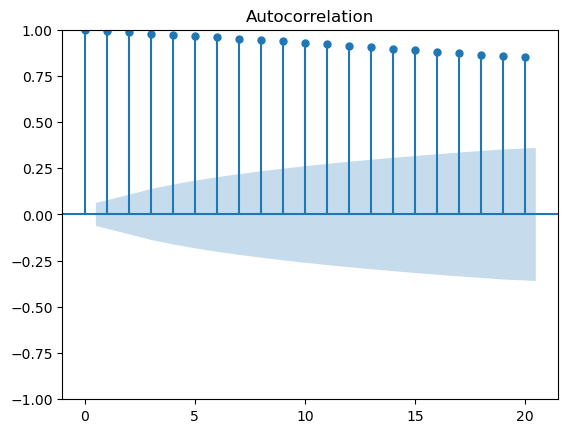

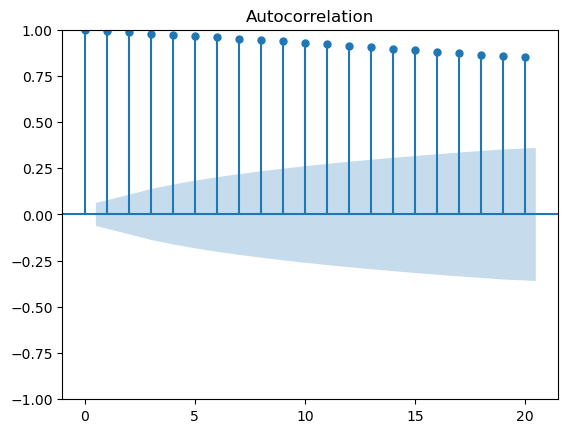

In [52]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk, lags=20)

The autocorrelation coefficients slowly decrease as the lag increases, which is a clear indicator that our random walk is not a stationary process. The shaded area represents a confidence interval. If a point is within the shaded area, then it is not significantly different from 0. Otherwise, the autocorrelation coefficient is significant. 

NOTE:
Autocorrelation Coefficients: Autocorrelation coefficients measure the correlation between a time series and its lagged versions. These coefficients range from -1 to 1, where 0 indicates no correlation, 1 indicates perfect positive correlation, and -1 indicates perfect negative correlation.

Slow Decrease with Lag: The statement mentions that the autocorrelation coefficients slowly decrease as the lag increases. This indicates that there is a correlation between the current observation and its past values, but this correlation diminishes as we look further back in time (i.e., as the lag increases).


Confidence Interval: The shaded area around the horizontal line at 0 in the autocorrelation graph represents a confidence interval. Autocorrelation coefficients falling within this shaded area are considered not statistically significant. In other words, they could plausibly occur due to random fluctuations in the data.

Significance Testing: Autocorrelation coefficients outside the shaded area are deemed statistically significant. This suggests that there is a non-random relationship between the time series and its lagged versions at those lags. The farther a coefficient is from the shaded area, the more statistically significant it is.

Because our random walk is not stationary, we need to apply a transformation to make it stationary in order to retrieve useful information from the ACF plots. Since our sequence mostly displays changes in the trend without seasonal patterns, we will apply a first-order differencing. Remember that we'll lose the first data point everytime we difference.

In [53]:
diff_random_walk = np.diff(random_walk, n=1) #n parameter controls how many times the array must be differenced. In this case, first order differencing is n=1

In [54]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}') #Retrieve the ADF statistic, which is the first value in the list of results
print(f'p-value: {ADF_result[1]}') #Retrieve the p-value, which is the second value in the list of results

ADF Statistic: -31.789310857560615
p-value: 0.0


The ADF statistic of -31.79 with a p-value of less than 0.05, This time the ADF statistic is a large negative number, and the p-value is less than 0.05. Therefore, we reject the null hypothesis, and we can say that this process has no unit root and is thus stationary.

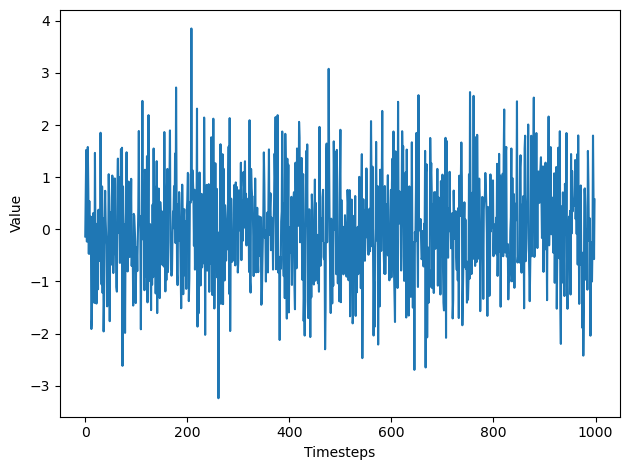

In [55]:
fig, ax = pt.subplots()
ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

pt.tight_layout()

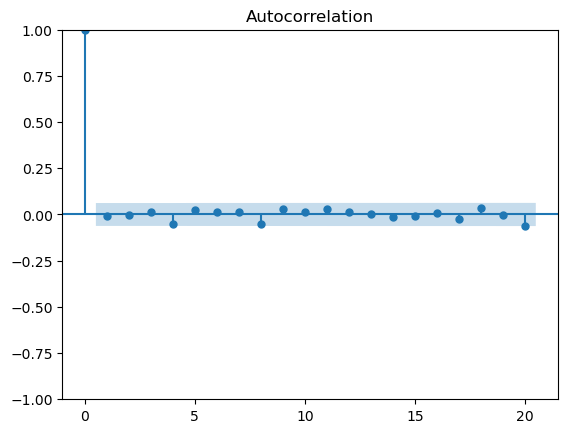

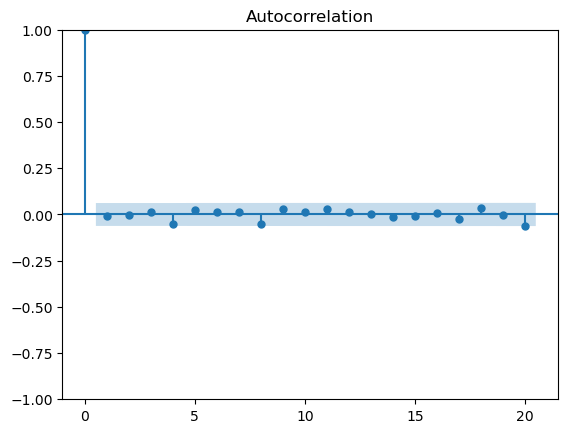

In [56]:
plot_acf(diff_random_walk, lags=20)

There is no significant autocorrelation coeffecients after lag 0. This means that the stationary process is completely random and can therefore be described as WHITE NOISE. Each value is simply a random step away from the previous one, with no relation between them. We have demonstrated that our simulated data is indeed a random walk: the series is stationary and uncorrelated after a first-order differencing, which corresponds to the definition of a random walk. 

Based on the autocorrelation graph above, there are no significant coeffecients after lag 0. This is a clear indicator that we are dealing with a random walk.

# Practical Scenario (Is GOOGL a Random Walk?)

In [57]:
import pandas as pd

data = pd.read_csv('C:/Users/Drew/Downloads/GOOGL.csv')

In [58]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


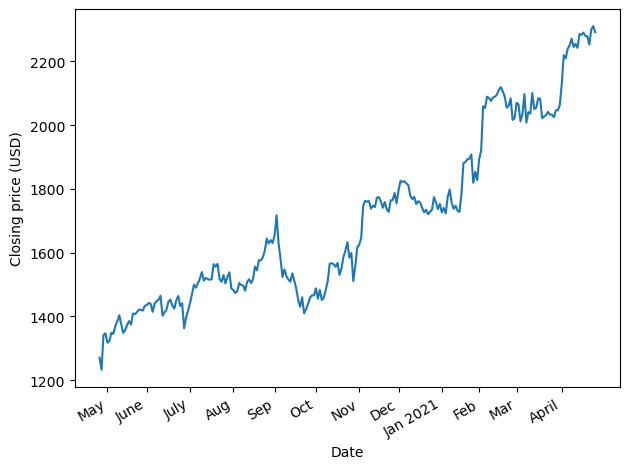

In [59]:
fig, ax = pt.subplots()

ax.plot(data['Date'], data['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

pt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
pt.tight_layout()

In [60]:
GOOGL_ADF_result = adfuller(data['Close'])

print(f'ADF Statistics: {GOOGL_ADF_result[0]}')
print(f'P-Value: {GOOGL_ADF_result[1]}')

ADF Statistics: 0.1602504866477145
P-Value: 0.9699419435913058


In [61]:
diff_close = np.diff(data['Close'], n=1)

In [62]:
GOOGL_diff_ADF_result = adfuller(diff_close)
print(f'ADF Statistics: {GOOGL_diff_ADF_result[0]}')
print(f'P-Value: {GOOGL_diff_ADF_result[1]}')

ADF Statistics: -5.303439704295221
P-Value: 5.386530961454919e-06


This gives an ADF statistics of -5.3 which is negative correlated and a p-value that is close to 0. Which as a result we can reject the null hypothesis. Therefore, we have a stationary process.

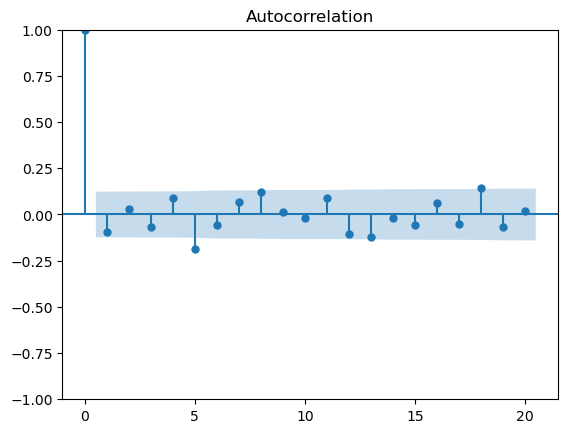

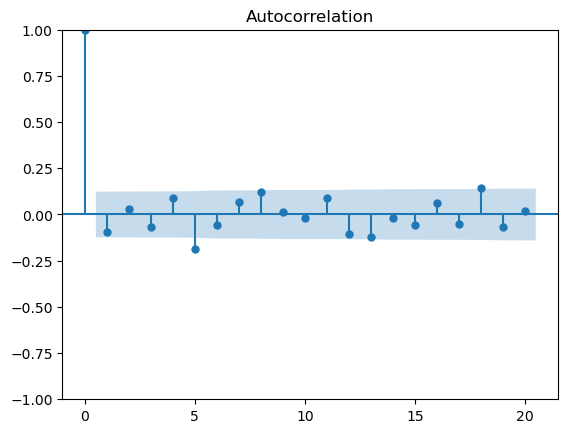

In [63]:
plot_acf(diff_close, lags=20)

This might be confusing wondering if there is a autocorrelation or not. We do not see any significant coefficients, except at lag 5 and 18. This situation can arise sometimes, and it is due to CHANCE only. In such situation, we can safely assume that the coefficients at lags 5 and 18 are not significant, because we do not have significant coefficients. It just happened by chance that the differenced values are slightly correlated with the ones at lags 5 and 18.

Thus, we can conclude that the closing price of GOOGL can be approximated by a random walk process. Taking the first difference makes the series stationary, and its ACF plot shows no autocorrelation, meaning that it is purely random.

# Forecasting a Random Walk

Predicting a random change is impossible, unless we predict a random value ourselves, which is not ideal. In this case, we can only use naive forecasting methods, or baselines which is covered in chapter 2. Since the value change randomly, no statistical learning model can be applied. Instead, we can only reasonable predict the historical mean, or the last value.

Depending on the use case, your forecasting horizon will vary. Ideally, when dealing with a random walk, you will only forecast the next timestep. However, you may be 
required to forecast many timesteps into the future. Let’s look at how to tackle each o 
these situations.

# Forecasting on a Long Horizon 
# (Results: Fairly Poor Predictions and Fail to predict the sudden increase)

In this section, we’ll forecast a random walk on a long horizon. This is not an ideal case as a random walk can unexpectedly increase or decrease because past observations are not predictive of changes in the future. Here we’ll continue working with our simulated random walk from section 3.1.1 which is simulating a random walk

To make things easier, we will assign the random walk to a DataFrame and split the
dataset into train and test sets. The train set will contain the first 800 timesteps, which corresponds to 80% of the simulated data. The test set will thus contain the last 200 values:

In [64]:
data = pd.DataFrame({'value': random_walk})

train = data[:800]
test = data[800:]

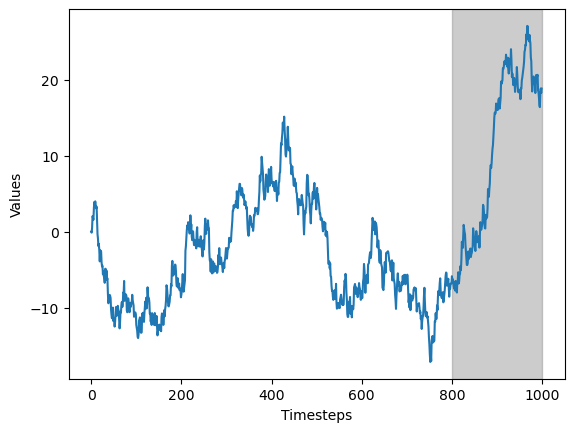

In [65]:
fig, ax = pt.subplots()
ax.plot(random_walk)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Values")
ax.axvspan(800, 1000, color="#808080", alpha = 0.4) #Test Set

As mentioned, we can only use naive forecasting methods for this situation, since we 
are dealing with a random walk. In this case, we will use the historical mean, the las 
known value, and the drift metho


 Forecasting the mean is fairly straightforward. We’ll simply calculate the mean of
the train set and say that the next 200 timesteps will be equal to that value. Here, w ’ll
create a new column pred_mean that will hold the historical mean as a prediction

In [66]:
mean = np.mean(train.value)
test.loc[:, "pred_mean"] = mean
test.head()

C:\Users\Drew\AppData\Local\Temp\ipykernel_4048\612843965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_mean"] = mean


,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


We got a pred_mean of -3.68. This means that we'll forecast that the next 200 timesteps of our simulated random walk will have a value of -3.68. Another possible baseline is to predict the last known value of the train set. Here, we'll simply extract the last value of the train set and assign its value as our prediction for the next 200 timesteps:

In [67]:
last_value = train.iloc[-1].value
test.loc[:, "last_value"] = last_value
test.head()

C:\Users\Drew\AppData\Local\Temp\ipykernel_4048\4213465548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "last_value"] = last_value


,value,pred_mean,last_value
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


# Drift Method

Now, we will apply the drift method. The drift method is a modification of predicting the last known value. In this case, we allow the values to increase or decrease over time. The rate at which values will change in the future is equal to that seen in the train set. Therefore, it is equivalent to calculating the slope between the first and last value of the train set and simply extrapolating this straight line into the future. 

Remember that we can calculate the slope of a straight line by dividing the change 
in the y-axis by the change in thex--axis  In our case, the change in the y-axis is the difference between the last value of our random walk yf and its initia  value yi. Then, th 
change in the x-axis is equivalent to the number of timesteps minus 1, as shown  n
equation 3.

We calculated the last value of the train set when we implemented the last known value 
baseline, and we know that th  initial value of our simulated random walk is 0; therefore 
we can plug the numbers into equation 3.11 and calculate the drift in equation 3.1

            drift = -6.81 (pred_last_value) - 0 (initial value of random walk) / 800 (train set) - 1 
                  = -0.00852.11.

In [68]:
deltaX = 800 - 1
deltaY = last_value - 0

drift = deltaY / deltaX
print(drift)

-0.008529346056640632


As expected, this give us a drift of -0.0085 which means that the values of our forecasts will slowly decrease overtime. The drift method simply states that the value of our forecast is linearly dependent on the timestep, the value of the drift, and the initial value of our random walk. 

                                forecast = drift x timestep + yi (initial value)

In [69]:
x_vals = np.arange(800, 1000, 1)
pred_drift = drift * x_vals + 0
test.loc[:, 'pred_drift'] = pred_drift
test.head()

C:\Users\Drew\AppData\Local\Temp\ipykernel_4048\1279497732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_drift'] = pred_drift


,value,pred_mean,last_value,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.823477
801,-6.392708,-3.677206,-6.814947,-6.832006
802,-6.296588,-3.677206,-6.814947,-6.840536
803,-6.758863,-3.677206,-6.814947,-6.849065
804,-7.193359,-3.677206,-6.814947,-6.857594


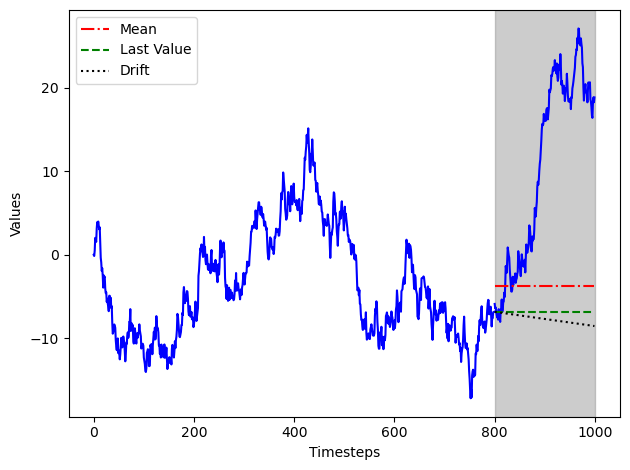

In [70]:
fig, ax = pt.subplots()
ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label="Mean")
ax.plot(test['last_value'], 'g--', label="Last Value")
ax.plot(test['pred_drift'], 'k:', label="Drift")
ax.axvspan(800,1000, color="#808080", alpha=0.4)
ax.legend(loc=2) #Place the legend on the upper left corner
ax.set_xlabel("Timesteps")
ax.set_ylabel("Values")
pt.tight_layout()

As you can see, the forecasts are faulty as they all fail to predict the sudden increase observed in the test set, which make sense because the future change in a random walk is completely random, thus unpredictable. 

We can further demonstrate that by calculating the mean squared error (MSE) of our forecasts. We cannot use the MAPE because our random walk can take the value of 0. It is impossible to calculate the percentage difference from an observed value of 0 because that implies a division by 0, which is not allowed in maths.

In [71]:
from sklearn.metrics import mean_squared_error 

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['last_value'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])
print(mse_mean, mse_last, mse_drift)

326.50277395297474 425.1726033055617 465.9076036601397


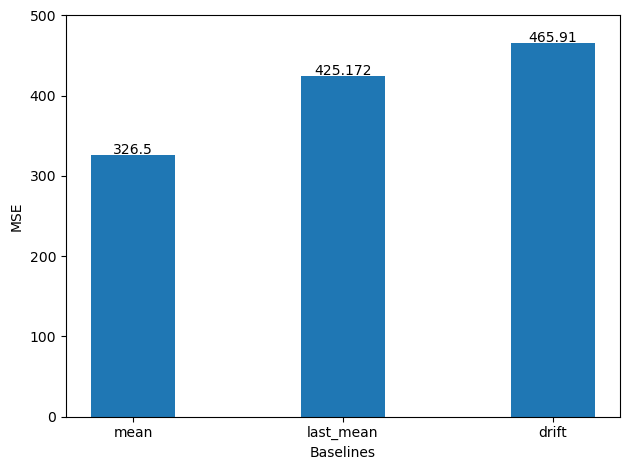

In [72]:
fig, ax = pt.subplots()

x = ['mean', 'last_mean', 'drift']
y = [326.50, 425.172, 465.91]

#Histogram
ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MSE')
ax.set_ylim(0, 500)

for index, value in enumerate(y): #Display the value on top of the bar 
    pt.text(x=index, y=value + 1, s=str(value), ha='center') #y= value + 1 is to position the text slightly above the bar so it does not overlap

pt.tight_layout()

As you can see, the best forecast was obtained by predicting the historical mean, and yet the MSE still exceeds 300. This is an extremely high value considering that our simulated random walk does not exceed the value of 30. By now, we should be convinced that forecasting a random walk on a long horizon does not make sense. Since the future value is dependent on the past value plus a random number, the randomness portion is magnified in a long horizon where many numbers are added over the course of many timesteps.

# Forecasting the next timestep

Forecasting the next timestep of a random walk is the only reasonable situation we can tackle, although we still use naive forecasting methods. Specifically, we will predict the last known value. However, we will make this forecast only for the next timestep. That way, our forecast should only be off by a random number, since the future value of a random walk is always the past value plus white noise.

To implement this method is straightforward:
- Take initial observed value
- Use it to predict the next time step
- Once we record a new value, it will be used as a forecast for the following timestep
- Repeat

According to page 53 Figure 3.17, lets apply this method to our random walk process. For the sake of illustrating this method, we will apply it over the entire random walk. This naive forecast can look deceptively amazing, when we are actually only predicting the last known value at each timestep.

A good way to simulate this process is by shifting our data, and the pandas library has a shift method that does exactly what we want. We simply pass in the number of periods, which in our case 1, since we are forecasting the next timestep:

In [73]:
df_shift = data.shift(periods=1) # df_shift is now our forecast over the entire random walk, and it corresponds to the last known value at each timestep.
df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


You will notice that at step 1, the value is 0, which corresponds to the observed value at step 0 in the simulated random walk. Therefore, we are effectively using the present observed value as a forecast for the next timstep. Plotting our forecast yields figure below.

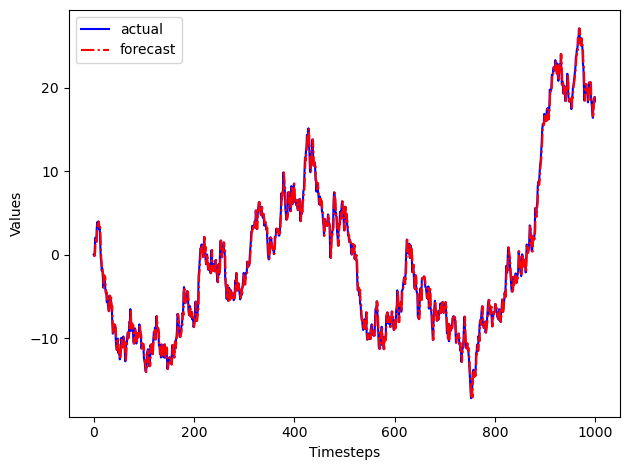

In [74]:
fig, ax = pt.subplots()
ax.plot(data, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')
ax.legend(loc=2)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Values")
pt.tight_layout()

Looking at the figure, you might think that we have developed an amazing model that is almost a perfect fit to our data. It seems that we do not have two separate lines in the graph, since both of them almost perfectly overlap, which is a sign of a perfect fit. Now, we can calculate the MSE:

In [75]:
mse_one_step = mean_squared_error(test['value'], df_shift[800:])
print(mse_one_step)

0.9256876651440581


The result yield a 0.93 MSE which is a relatively performant model as it is very close to 0. However, we know that we are simply forecasting the value observed at the previous timestep. This becomes more apparent if we zoom in on our graph as shown below.

Thus, if a random walk process must be forecast, it is better to make many short-term forecasts. That way, we do not allow for many random numbers to accumulate over time, which will degrade teh quality of our forecasts in the long term. Because a random process takes random steps into the future, we cannot use statiscal or deep learning techniques to fit suich a process: there is nothing to learn from randomness and it cannot be predicted. Instead, we must rely on naive forecasting methods.

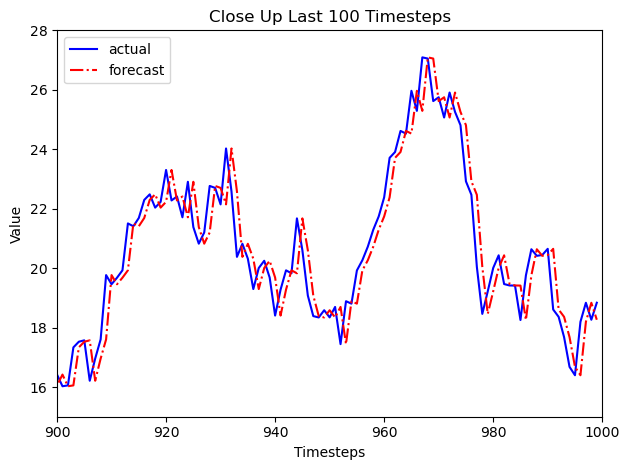

In [78]:
fig, ax = pt.subplots()

ax.plot(data, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(15, 28)
ax.set_title("Close Up Last 100 Timesteps")
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

pt.tight_layout()

# Conclusion
In the presence of random walk, you can only reasonably apply baseline models to make forecasts. You cannot fit a statistical model or use deep learning techniques on data that takes random steps in the future. Ultimately, you cannot predict random movements.

Random walk is a sequence where the first difference is not autocorrelated is a stationary process, meaning that its mean, variance, and autocorrelation are constant over time. The steps required to identify a random walk is as per the steps "Identify a random walk" above. 

What if your process is stationary and autocorrelated? Meaning that you see consecutive significant coefficients on the ACF plot. As per the flow above, if its not a random walk, you have to find another model to approximate the process and forecast it. In such situation, you are facing a process that can be approximated by the moving average (MA) model, an autoregressive (AR) model, or the combination of both processes, leading to an autoregressive moving average model (ARMA).

# Summary
- A random walk is a process where the first difference is stationary and not autocorrelated.
- We cannot use statistical or deep learning techniques on a random walk, since it moves at random in the futureu. Thus, we must use naive forecasts.
- A stationary time series is that the statistical properties (mean, variance, autocorrelation) do not change over time.
- The Augmented Dicky Fuller (ADF) test is used to assess stationarity by testing for unit roots.
- The null hypothesis of the ADF test is that there is a unit root in the series. If ADF is a large negative value and the p-value is less than 0.05, the null hypothesis is rejected, and the series is stationary.
- Transformations are used to make a series stationary. Differencing can stabilize the trend and seasonality, while logarithms stabilize the variance.
- Autocorrelation measures the correlation between a variable and itself at a previous timestep (lag). The autocorrelation function (ACF) shows how the autocorrelation changes as a function of the lag.
- Ideally, we will forecast a random walk in the short term or the next timestep. That way, we do not allow for random numbers to accumulate, which will degrade the quality of our forecasts in the long term.